<a href="https://colab.research.google.com/github/Sanjeev2004/Stock_Price_prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install yfinance --quiet

In [6]:
import yfinance as yf
import pandas as pd

# Download AAPL stock data
df = yf.download('AAPL', start='2014-01-01', end='2024-01-01')

# Display the first few rows to verify
display(df.head())

/tmp/ipython-input-4263848815.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2014-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.192822,17.314045,17.158320,17.272083,234684800
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600
2014-01-06,16.906860,16.996067,16.585775,16.705444,412610800
2014-01-07,16.785946,16.969955,16.720051,16.918980,317209200
2014-01-08,16.892248,16.957521,16.743984,16.747712,258529600


In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Use just the 'Close' price and convert to numeric, coercing errors
data = pd.to_numeric(df[('Close', 'AAPL')], errors='coerce').dropna().values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.reshape(-1, 1))
# Create sequences
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i-window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model=Sequential([
    LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam',loss='mse')
model.fit(X,y,epochs=50,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0575
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0109e-04
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3217e-04
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6019e-04
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3814e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1787e-04
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1284e-04
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6000e-04
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3853e-04
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5703e-04
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0384e-04
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3883e-04
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0343e-04
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0286e-04
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


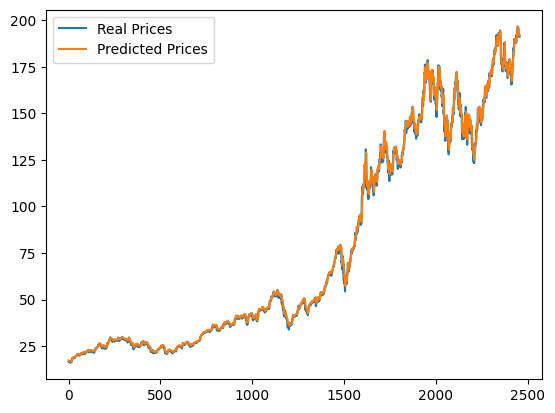

In [10]:
import matplotlib.pyplot as plt

predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

plt.plot(real_prices, label='Real Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()